In [57]:
import sys

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


sys.path.append("../")
from Datasets.DataCreation import getDatasetV1, getDatasetV2

In [58]:
df = getDatasetV1(None)
df.drop(columns=['year', 'district'], inplace=True)

In [59]:
df

,mean_total_snow,mean_total_precip,mean_snow_on_grnd,mean_total_rain,mean_temp,has_ergot
0,0.303979,1.189348,6.005903,0.529384,0.451735,False
1,0.116534,0.871078,0.860822,0.328105,4.239744,False
2,0.155237,0.790694,3.564932,0.250507,1.628772,True
3,0.135583,1.299196,1.054999,0.332711,3.060292,True
4,0.010502,0.908037,0.010959,0.078265,2.796575,True
...,...,...,...,...,...,...
1059,0.000000,1.151507,14.356164,0.000000,0.777808,True
1060,0.000000,1.097808,6.519178,0.000000,2.653288,True
1061,0.000000,2.099726,5.945205,0.000000,1.931507,True
1062,0.000000,1.102466,5.210959,0.000000,1.386849,True


In [60]:
X = df.drop(columns=["has_ergot"])
y = df['has_ergot']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
X_train

,mean_total_snow,mean_total_precip,mean_snow_on_grnd,mean_total_rain,mean_temp
56,0.112877,1.601507,0.000000,1.488630,0.154795
632,0.000000,1.018493,4.775342,0.000000,1.638493
345,0.185128,1.200829,0.999108,0.691819,4.386679
887,0.000000,0.870959,9.760731,0.000000,3.638767
54,0.204178,1.006849,2.337215,0.805274,0.236393
...,...,...,...,...,...
847,0.000000,0.868767,3.523288,0.000000,3.019178
715,0.000000,0.924110,5.712329,0.000000,0.779178
905,0.000000,0.705205,4.186301,0.000000,0.667397
235,0.131742,0.475303,0.180871,0.343601,6.008826


In [64]:
model = KNeighborsClassifier(n_neighbors=1)

In [65]:
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [66]:
y_pred = model.predict(X_test_scaled)

In [67]:
accuracy_score(y_test, y_pred)

0.6995305164319249

In [68]:
score = []

for i in range(1,36):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)

    score.append(accuracy_score(y_test, y_pred))

In [69]:
score

[0.6995305164319249,
 0.6384976525821596,
 0.7464788732394366,
 0.704225352112676,
 0.7793427230046949,
 0.7652582159624414,
 0.8075117370892019,
 0.7934272300469484,
 0.8262910798122066,
 0.8262910798122066,
 0.8356807511737089,
 0.8403755868544601,
 0.8309859154929577,
 0.8450704225352113,
 0.8403755868544601,
 0.8450704225352113,
 0.8403755868544601,
 0.8450704225352113,
 0.8356807511737089,
 0.8497652582159625,
 0.8403755868544601,
 0.8356807511737089,
 0.8356807511737089,
 0.8403755868544601,
 0.8450704225352113,
 0.8403755868544601,
 0.8403755868544601,
 0.8356807511737089,
 0.8403755868544601,
 0.8403755868544601,
 0.8403755868544601,
 0.8403755868544601,
 0.8403755868544601,
 0.8403755868544601,
 0.8356807511737089]

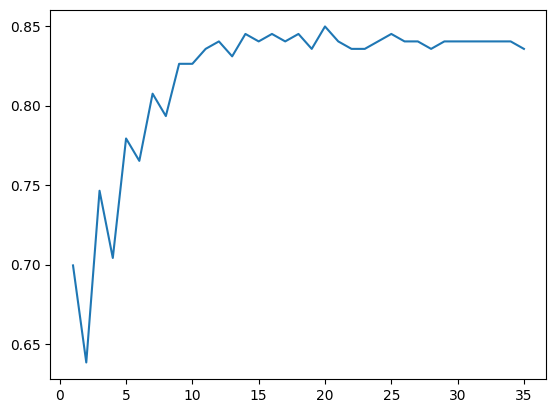

In [70]:
import matplotlib.pyplot as plt

plt.plot(range(1,36), score)